# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns. The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

# Format

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

# 2. Collect and load data

In [51]:
data=pd.read_csv('BigCity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  49 non-null     int64
 1   u           49 non-null     int64
 2   x           49 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [53]:
data.rename(columns={'Unnamed: 0':'Index'},inplace=True)

In [54]:
data.set_index('Index',inplace=True)

In [55]:
data

,u,x
Index,,
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63
7,29,50
8,23,48
9,30,111


# Explore numeric variables - five number summary

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   u       49 non-null     int64
 1   x       49 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [57]:
data.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms

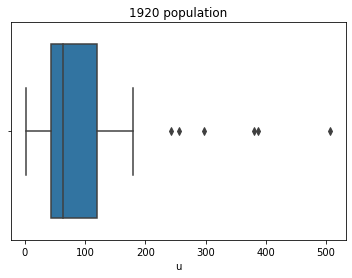

In [58]:
sns.boxplot(data['u'])
plt.title('1920 population')
plt.show()

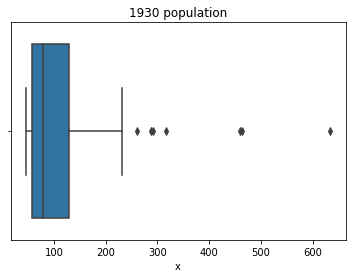

In [59]:
sns.boxplot(data['x'])
plt.title('1930 population')
plt.show()

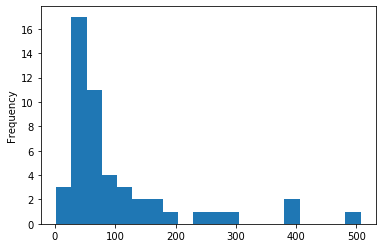

In [60]:
data['u'].plot(kind='hist',bins=20)
plt.show()

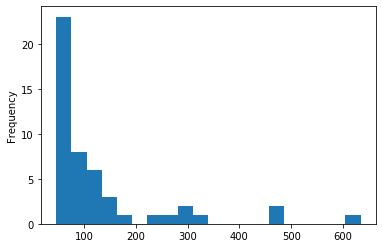

In [61]:
data['x'].plot(kind='hist',bins=20)
plt.show()

# 3b. Measure spread – variance and standard deviation

In [62]:
print('Standard Deviation:',data['u'].std())

Standard Deviation: 104.40506054146351


In [64]:
print('Variance:',data['u'].var())

Variance: 10900.416666666662


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

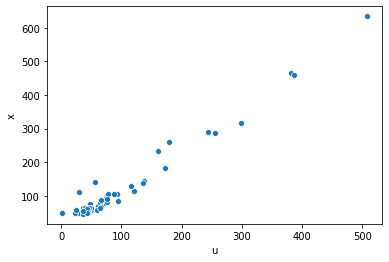

In [28]:
sns.scatterplot(data['u'],data['x'])

#Positively correlated and shows some linear relationship here itself based on looking at graph

In [29]:
pd.crosstab(data['u'],data['x'])

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset

In [30]:
data.shape

(49, 2)

In [31]:
x=data['u']
y=data['x']

In [32]:
x.shape,y.shape

((49,), (49,))

# 6. Check the dataset for any missing values and also print out the correlation matrix

In [33]:
data.isna().sum()

u    0
x    0
dtype: int64

In [34]:
data.corr()
#highly posively correlated

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


# 7. Split data into train, test sets

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((39,), (10,), (39,), (10,))

In [37]:
xtrain=np.array(xtrain).reshape(-1,1)


# 8. Find coefficients & intercept

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
b1=lr.coef_
b1

array([1.15945123])

In [41]:
b0=lr.intercept_
b0

9.718455322828262

# 9. Linear Relationship between feature and target

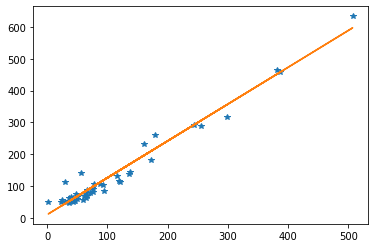

In [42]:
plt.plot(x,y,'*')
plt.plot(x,b1*x+b0)
plt.show()

# 10. Evaluation of model with scikit-learn

In [43]:
xtest=np.array(xtest).reshape(-1,1)


In [44]:
ypred_test=lr.predict(xtest)
ypred_train=lr.predict(xtrain)

In [45]:
r2_score(ytrain,ypred_train)

0.9682175540860046

In [46]:
mse=mean_squared_error(ytrain,ypred_train)
rmse=np.sqrt(mse)
rmse

23.18943724391406

In [47]:
r2_score(ytest,ypred_test)

0.9181922560396981

In [48]:
mse=mean_squared_error(ytest,ypred_test)
rmse=np.sqrt(mse)
rmse

23.385235190249123

# 11. Calculate the accuracy of the model for both training and test data set

In [49]:
print("Train Accuracy:",lr.score(xtrain, ytrain))
print("Test Accuracy:",lr.score(xtest, ytest))

Train Accuracy: 0.9682175540860046
Test Accuracy: 0.9181922560396981
